# Explore here

In [81]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# My dataset
dt_all = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
print(dt_all.head(5))


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [82]:
dt_all.shape

(48895, 16)

In [83]:
dt_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Datos numericos enteros: id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365.
- Datos numericos decimales: latitude, longitude, reviews_per_month.
- Datos Categoricos: name, host_name, neighbourhood_group, neighbourhood, room_type, last_review.

In [84]:
print('Datos duplicados en name: ' + str(dt_all['name'].duplicated().sum()))
print('Datos duplicados en host_id: ' + str(dt_all['host_id'].duplicated().sum()))
print('Datos duplicados en id: ' + str(dt_all['id'].duplicated().sum()))

Datos duplicados en name: 989
Datos duplicados en host_id: 11438
Datos duplicados en id: 0


In [85]:
dt_all = dt_all.drop_duplicates(subset = dt_all.columns.difference(['id','host_id','name']))
print(dt_all.shape)
dt_all.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [86]:
if dt_all.duplicated().sum():
    dt_all = dt_all.drop_duplicates()
print(dt_all.shape)
dt_all.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


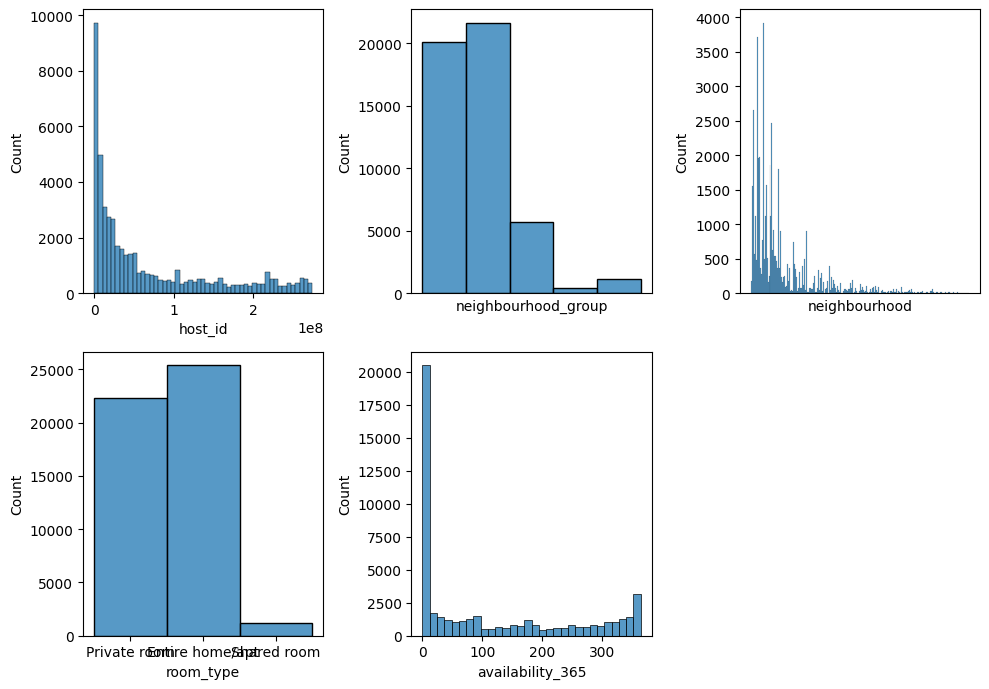

In [108]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = dt_all, x = "host_id")
sns.histplot(ax = axis[0, 1], data = dt_all, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0, 2], data = dt_all, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1, 0], data = dt_all, x = "room_type")
sns.histplot(ax = axis[1, 1], data = dt_all, x = "availability_365")
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Variables Categoricas. 

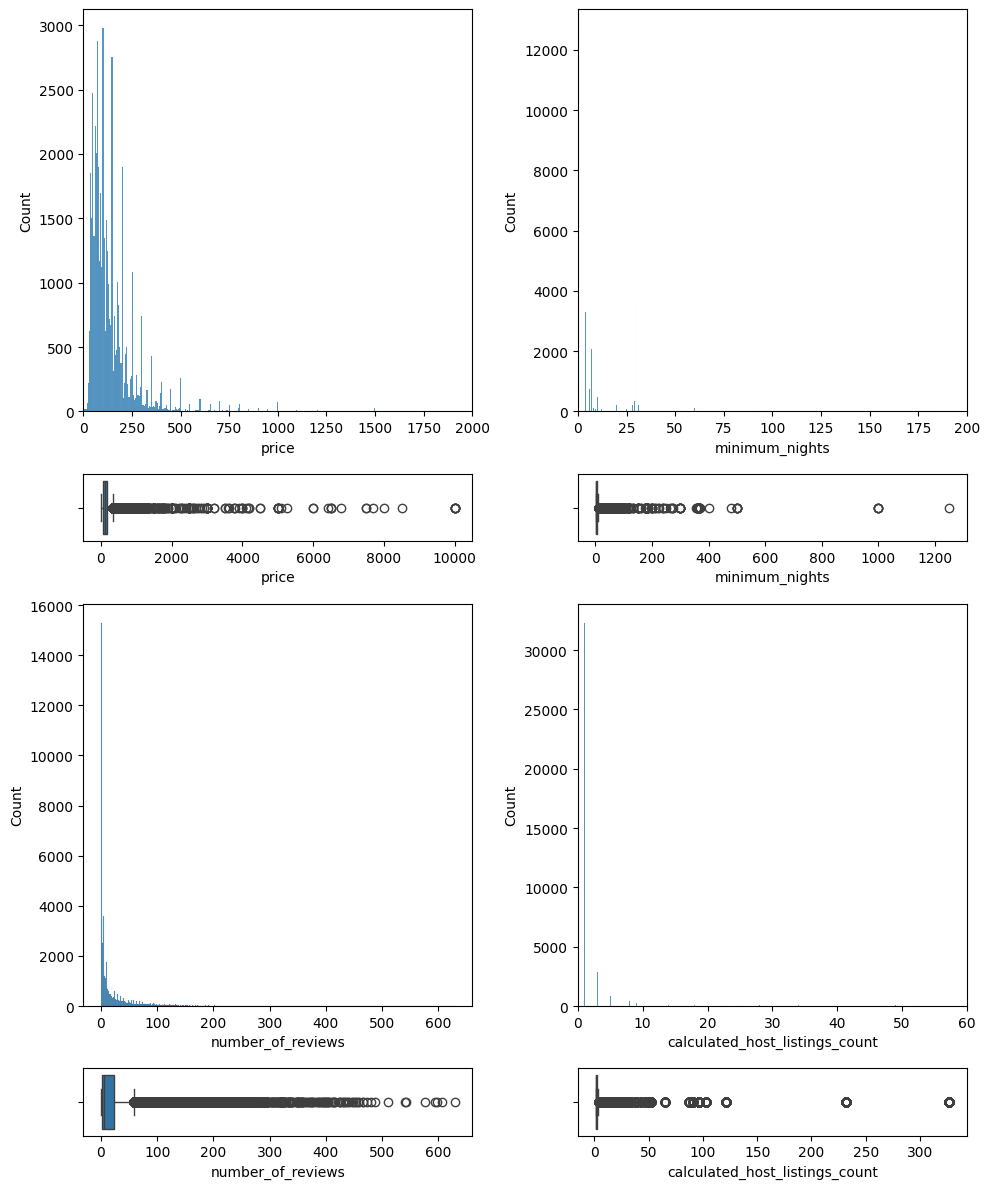

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# price
sns.histplot(ax = axis[0, 0], data = dt_all, x = "price").set_xlim(0,2000) # Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 0], data = dt_all, x = "price")

# Mínimo de noches
sns.histplot(ax = axis[0, 1], data = dt_all, x = "minimum_nights").set_xlim(0,200)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 1], data = dt_all, x = "minimum_nights")

# Número de reviews
sns.histplot(ax = axis[2, 0], data = dt_all, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = dt_all, x = "number_of_reviews")

# 
sns.histplot(ax = axis[2, 1], data = dt_all, x = "calculated_host_listings_count").set_xlim(0,60)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[3, 1], data = dt_all, x = "calculated_host_listings_count")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [113]:
dt_all["minimum_nights"].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         3
3         1
4        10
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 48895, dtype: int64>